In [103]:
%%time
import numpy as np

# 三角形三个顶点坐标
p = np.array([[-3., 0,2], [0, -5, 2], [0, 0, 2]])

# 根据三角形的三个顶点创建一个立方体矩阵
x = p[:,0]
y = p[:,1]
z = p[:,2]

x_max = np.ceil(np.max(x))
x_min = np.floor(np.min(x))
y_max = np.ceil(np.max(y))
y_min = np.floor(np.min(y))
z_max = np.ceil(np.max(z))
z_min = np.floor(np.min(z))

length = x_max - x_min
width = y_max - x_min
height = z_max - z_min

dx = 1
dy = 1
dz = 1

num_x = (x_max-x_min)/dx
num_y = (y_max-y_min)/dy
num_z = (z_max-z_min)/dz

xi=np.linspace(x_min,x_max,(num_x+1).astype(int))
yi=np.linspace(y_min,y_max,(num_y+1).astype(int))
zi=np.linspace(z_min,z_max,(num_z+1).astype(int))

xx,yy = np.meshgrid(xi,yi)


# 创建起点矩阵
xyS = np.array([[(xx, yy) for xx in xi] for yy in yi])

zzS = np.ones((xyS.shape[0],xyS.shape[1],1))*zi[0]
zS = np.array(zzS).reshape(xyS.shape[0],xyS.shape[1], -1)
xyzS = np.concatenate((xyS, zS), axis = -1)

gS = xyzS.reshape(-1, xyzS.shape[-1])
gS[:,2] = gS[0,2]-1
# print('起点矩阵：\n', gS,gS.shape)


# 创建方向向量矩阵
zzV = np.ones((xyS.shape[0],xyS.shape[1],1))*(zi[0])
# zV = np.array(zzV).reshape(xyS.shape[0],xyS.shape[1], -1)
xyzV = np.concatenate((xyS, zzV), axis = -1)
gV = xyzV.reshape(-1, xyzV.shape[-1])
gV[:,2] = gV[0,2]+1
gV[:,0:2] = 0
# print('方向向量矩阵：\n', gV,gV.shape)


# 求交点矩阵
v1, v2, v3 = p
eps = 0.000001

edge1 = v2 - v1
edge2 = v3 - v1
pvec = np.cross(gV, edge2)
det = edge1.dot(pvec.T)

null_inter = np.full((gV.shape[0],gV.shape[1]),np.nan)
intersetion = np.full((gV.shape[0],1),1)

intersetion[abs(det) < eps] = np.array([False])

inv_det = 1.0 / det
tvec = gS - v1

u = np.full((gV.shape[0],1),np.nan)
for i in range(u.shape[0]):
    u[i] = tvec[i].dot(pvec[i]) * inv_det[i]

intersetion[u.flatten()<0.0 ] = np.array([False])
intersetion[u.flatten()>1.0] = np.array([False])

qvec = np.cross(tvec, edge1)

v = np.full((gV.shape[0],1),np.nan)
for i in range(u.shape[0]):
    v[i] = gV[i].dot(qvec[i]) * inv_det[i]

intersetion[v.flatten()<0.0 ] = np.array([False])
intersetion[(u + v).flatten() > 1.0] = np.array([False])

t = np.full((gV.shape[0],1),np.nan)
for i in range(t.shape[0]):
    t[i] = edge2.dot(qvec[i]) * inv_det[i]

intersetion[t.flatten()< eps] = np.array([False])

a = 1-u-v
# d = np.hstack((a,u,v,null_inter))
p = v1*a+v2*u+v3*v
intersetionPoints = p*intersetion.reshape(gV.shape[0],1)
for i in range(intersetionPoints.shape[0]):
    if intersetion[i] == False:
        intersetionPoints[i] = np.array([np.nan,np.nan,np.nan])

intersetionPoints = np.array(list(filter(lambda intersetionPoints: not np.isnan(intersetionPoints[1]), intersetionPoints)))
print(intersetionPoints,intersetionPoints.shape)

    

[[ 0.00000000e+00 -5.00000000e+00  2.00000000e+00]
 [ 1.66533454e-16 -4.00000000e+00  2.00000000e+00]
 [-1.00000000e+00 -3.00000000e+00  2.00000000e+00]
 [ 0.00000000e+00 -3.00000000e+00  2.00000000e+00]
 [-1.00000000e+00 -2.00000000e+00  2.00000000e+00]
 [ 0.00000000e+00 -2.00000000e+00  2.00000000e+00]
 [-2.00000000e+00 -1.00000000e+00  2.00000000e+00]
 [-1.00000000e+00 -1.00000000e+00  2.00000000e+00]
 [ 0.00000000e+00 -1.00000000e+00  2.00000000e+00]
 [-3.00000000e+00  0.00000000e+00  2.00000000e+00]
 [-2.00000000e+00  0.00000000e+00  2.00000000e+00]
 [-1.00000000e+00  0.00000000e+00  2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.00000000e+00]] (13, 3)
CPU times: total: 0 ns
Wall time: 3.99 ms


Text(0.5, 0, 'Z Label')

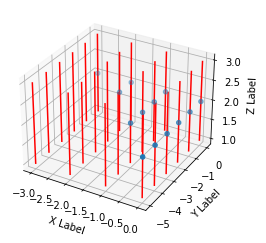

In [104]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(intersetionPoints[:,0], intersetionPoints[:,1], intersetionPoints[:,2])
for i in range(0,gS.shape[0]):
    ax.plot([gS[i][0],gS[i][0]], [gS[i][1],gS[i][1]], [gS[i][2],gV[i][2]], c='r')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')